In [1]:
fname = "..\\results\\caco2\\robustness\\statistics.xlsx"

In [2]:
import pandas as pd
from scipy.stats import spearmanr, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
df = pd.read_excel(fname)

In [8]:
met2name = {
    "DM_icit[c]" : "Isocitrate",
    "DM_but[c]" : "Butyrate",
    "DM_lac[c]" : "Lactate",
    "DM_pyr[c]" : "Pyruvate",
    "DM_cit[c]" : "Citrate",
    "DM_succ[c]" : "Succinate",
    "DM_fum[c]" : "Fumarate",
    "DM_mal[c]" : "Malate",
    "DM_oaa[c]" : "Oxaloacetate",
    "DM_glx[c]" : "Glyoxylate",
    "DM_ppa[c]" : "Propionate",
    "DM_2mcit[c]" : "Methylcitrate",
    "DM_3hpp[c]" : "3-Hydroxypropionate"
}

In [11]:
import numpy as np
from scipy.stats import mannwhitneyu, spearmanr

# Initialize result containers
stat_results = {}
spearman_results = {}

# Get simulation and experimental subsets
simulation_data = df[df["Type"] == "Simulation"]
experiment_data = df[df["Type"].str.startswith("Experiment")]

# List of metabolite columns (excluding Butyrate mM and Type)
metabolite_columns = [col for col in df.columns if col not in ["Butyrate mM", "Type"]]

for column in metabolite_columns:
    sim_values = []
    exp_values = []

    # Loop over each Butyrate concentration
    for butyrate in simulation_data["Butyrate mM"].unique():
        sim_val = simulation_data[simulation_data["Butyrate mM"] == butyrate][column].values
        exp_vals = experiment_data[experiment_data["Butyrate mM"] == butyrate][column].values

        if sim_val.size > 0 and exp_vals.size > 0:
            # Repeat simulation value to match number of experimental values
            sim_values.extend([sim_val[0]] * len(exp_vals))
            exp_values.extend(exp_vals)

    # Apply log1p transform
    sim_log = np.array(sim_values)
    exp_log = np.array(exp_values)

    # Mann-Whitney U test
    stat, p_mw = mannwhitneyu(sim_log, exp_log)
    # Spearman correlation
    corr, p_spear = spearmanr(sim_log, exp_log)

    # Store results
    stat_results[column] = {"Test Statistic": stat, "p-value": p_mw}
    spearman_results[column] = {"Spearman Correlation": corr, "p-value": p_spear}

# Display results
print("\nMann-Whitney U Test Results:")
for k, v in stat_results.items():
    print(f"{k}: U = {v['Test Statistic']:.3f}, p = {v['p-value']:.4g}")

print("\nSpearman Correlation Results:")
for k, v in spearman_results.items():
    print(f"{k}: ρ = {v['Spearman Correlation']:.2f}, p = {v['p-value']:.4g}")



Mann-Whitney U Test Results:
DM_icit[c]: U = 196.000, p = 7.11e-06
DM_but[c]: U = 0.000, p = 7.11e-06
DM_lac[c]: U = 0.000, p = 7.11e-06
DM_pyr[c]: U = 196.000, p = 7.11e-06
DM_cit[c]: U = 196.000, p = 7.11e-06
DM_succ[c]: U = 196.000, p = 7.11e-06
DM_fum[c]: U = 196.000, p = 7.11e-06
DM_mal[c]: U = 196.000, p = 7.11e-06
DM_oaa[c]: U = 196.000, p = 7.11e-06
DM_glx[c]: U = 196.000, p = 7.11e-06
DM_ppa[c]: U = 196.000, p = 7.11e-06
DM_2mcit[c]: U = 196.000, p = 7.11e-06
DM_3hpp[c]: U = 196.000, p = 7.11e-06

Spearman Correlation Results:
DM_icit[c]: ρ = 0.25, p = 0.3958
DM_but[c]: ρ = 0.82, p = 0.0003306
DM_lac[c]: ρ = 0.88, p = 2.925e-05
DM_pyr[c]: ρ = 0.27, p = 0.3486
DM_cit[c]: ρ = 0.74, p = 0.002295
DM_succ[c]: ρ = 0.94, p = 8.37e-07
DM_fum[c]: ρ = 0.68, p = 0.007337
DM_mal[c]: ρ = 0.82, p = 0.0003083
DM_oaa[c]: ρ = 0.76, p = 0.001631
DM_glx[c]: ρ = -0.88, p = 2.619e-05
DM_ppa[c]: ρ = 0.73, p = 0.003157
DM_2mcit[c]: ρ = -0.40, p = 0.1579
DM_3hpp[c]: ρ = 0.84, p = 0.0001447


C:\Users\Jordi\AppData\Local\Temp\ipykernel_40860\656690237.py:69: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


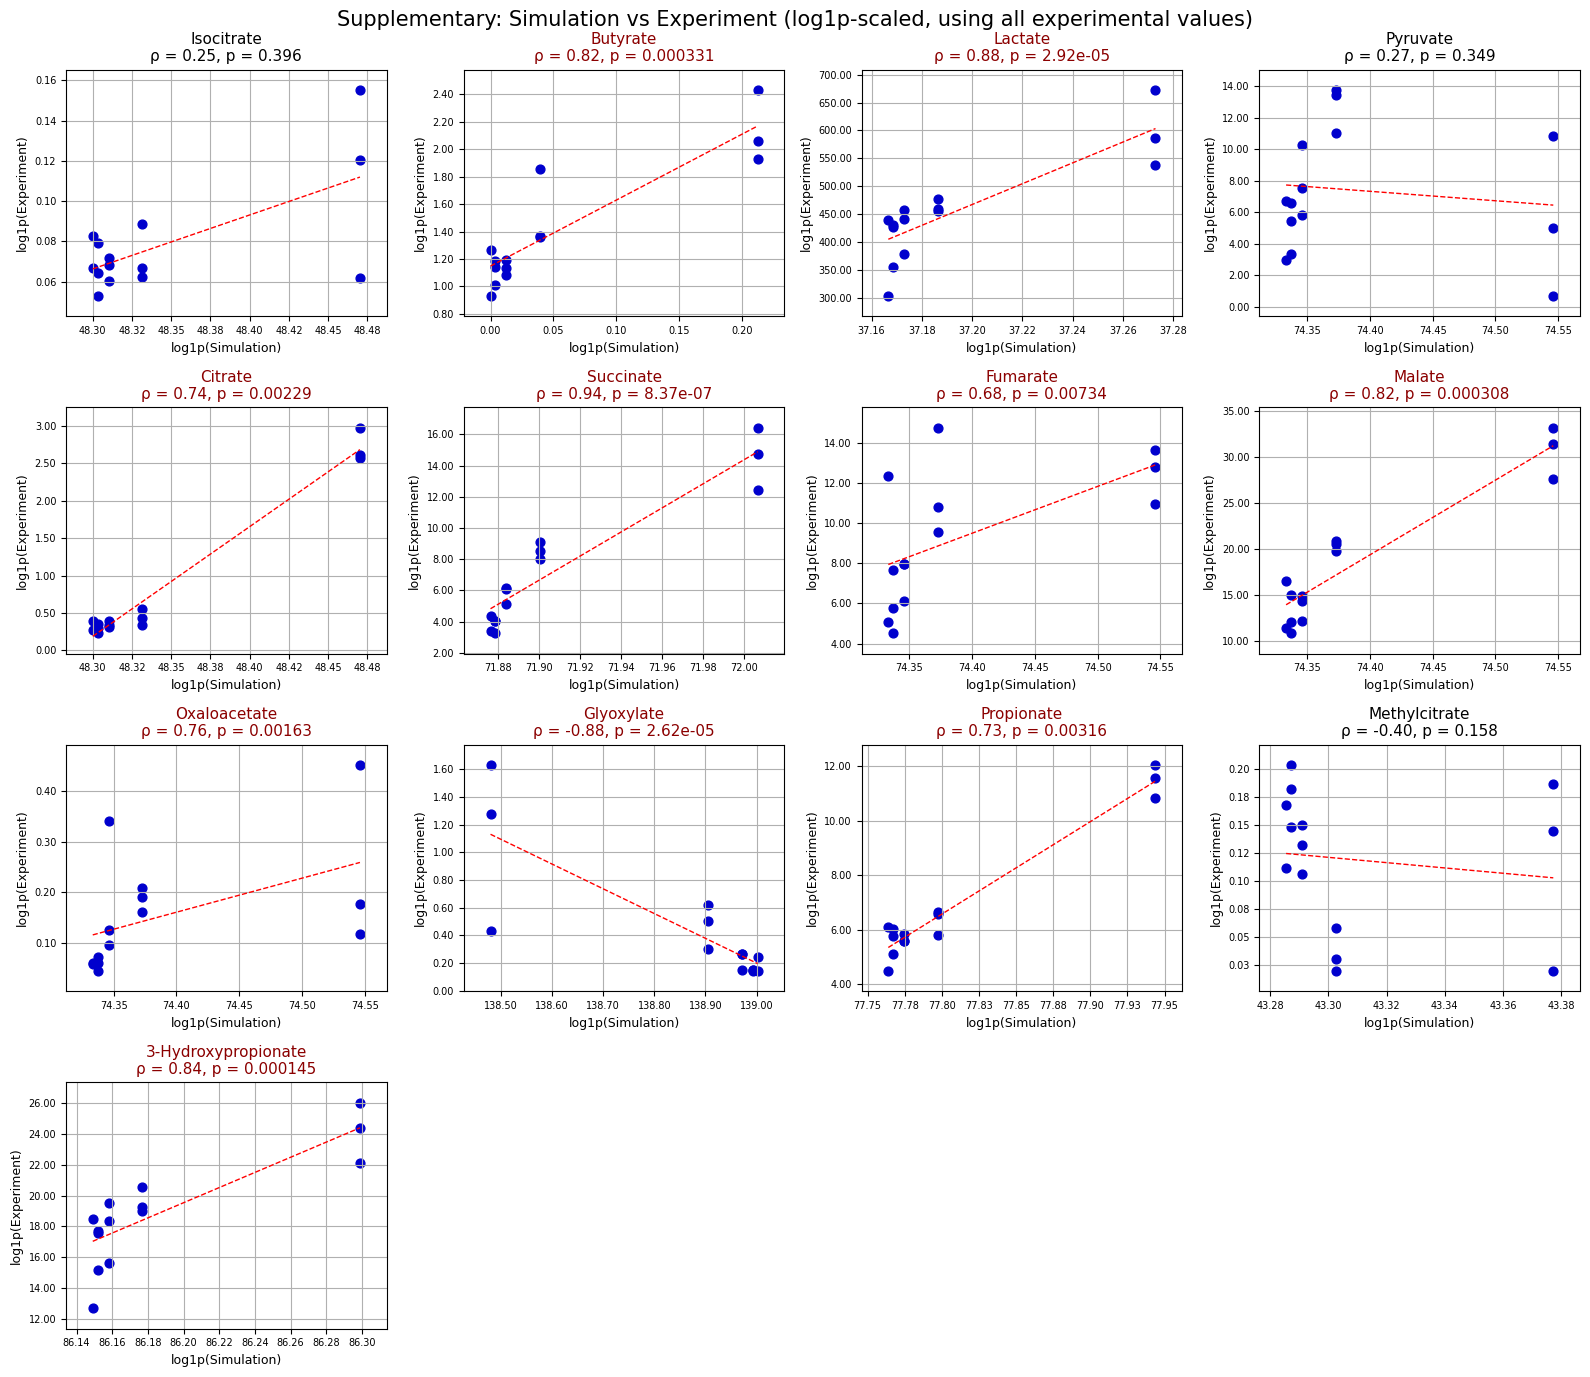

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter

# Metabolite list
metabolites = list(spearman_results.keys())

# Layout
n_cols = 4
n_rows = int(np.ceil(len(metabolites) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), constrained_layout=True)
axs = axs.flatten()

for i, metabolite in enumerate(metabolites):
    ax = axs[i]

    sim_values = []
    exp_values = []

    for butyrate in df['Butyrate mM'].unique():
        sim_val = df[(df['Butyrate mM'] == butyrate) & (df['Type'] == 'Simulation')][metabolite]
        exp_vals = df[(df['Butyrate mM'] == butyrate) & (df['Type'].str.contains('Experiment'))][metabolite]

        # Repeat simulation value for number of experimental replicates
        if not sim_val.empty and not exp_vals.empty:
            sim_values.extend([sim_val.values[0]] * len(exp_vals))
            exp_values.extend(exp_vals.values.tolist())

    # Log-transform
    sim_log = np.array(sim_values)
    exp_log = np.array(exp_values)

    # Scatter plot
    ax.scatter(sim_log, exp_log, color='mediumblue', s=40)

    # Regression line
    slope, intercept, _, _, _ = linregress(sim_log, exp_log)
    x_vals = np.linspace(min(sim_log), max(sim_log), 100)
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, 'r--', lw=1)

    # Axis limits
    x_margin = (max(sim_log) - min(sim_log)) * 0.1 or 0.1
    y_margin = (max(exp_log) - min(exp_log)) * 0.1 or 0.1
    ax.set_xlim(min(sim_log) - x_margin, max(sim_log) + x_margin)
    ax.set_ylim(min(exp_log) - y_margin, max(exp_log) + y_margin)

    # Title with stats
    rho = spearman_results[metabolite]['Spearman Correlation']
    pval = spearman_results[metabolite]['p-value']
    color = 'darkred' if pval < 0.05 else 'black'
    ax.set_title(f"{met2name[metabolite]}\nρ = {rho:.2f}, p = {pval:.3g}", fontsize=11, color=color)

    # Labels and formatting
    ax.set_xlabel("log1p(Simulation)", fontsize=9)
    ax.set_ylabel("log1p(Experiment)", fontsize=9)
    ax.tick_params(labelsize=7)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Supplementary: Simulation vs Experiment (log1p-scaled, using all experimental values)", fontsize=15)
plt.tight_layout()
plt.show()

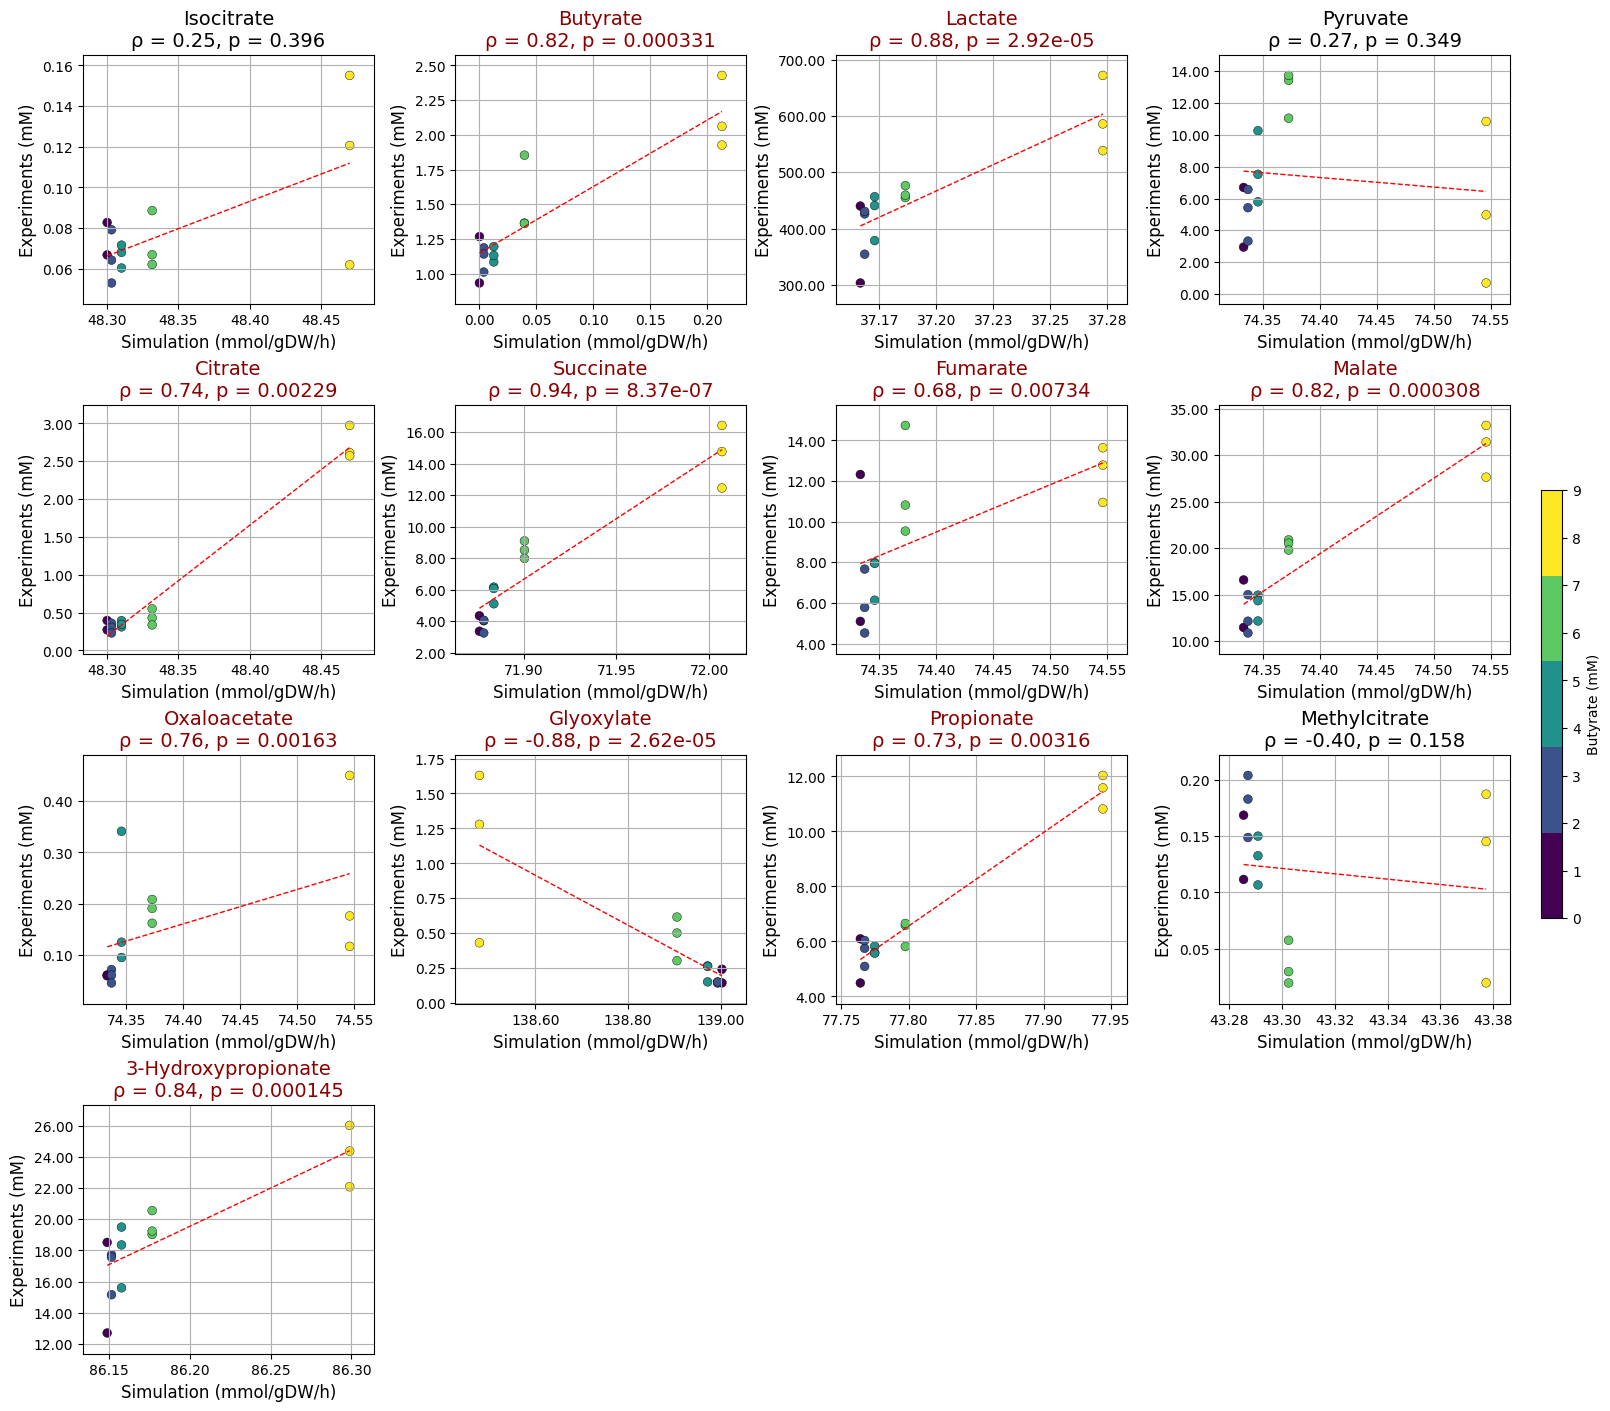

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Metabolite list
metabolites = list(spearman_results.keys())

# Create color map for butyrate concentrations
unique_butyrate = sorted(df['Butyrate mM'].unique())
cmap = cm.get_cmap('viridis', len(unique_butyrate))
norm = mcolors.Normalize(vmin=min(unique_butyrate), vmax=max(unique_butyrate))
color_dict = {b: cmap(i) for i, b in enumerate(unique_butyrate)}

# Layout
n_cols = 4
n_rows = int(np.ceil(len(metabolites) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), constrained_layout=True)
axs = axs.flatten()

for i, metabolite in enumerate(metabolites):
    ax = axs[i]

    sim_values = []
    exp_values = []
    colors = []

    for butyrate in unique_butyrate:
        sim_val = df[(df['Butyrate mM'] == butyrate) & (df['Type'] == 'Simulation')][metabolite]
        exp_vals = df[(df['Butyrate mM'] == butyrate) & (df['Type'].str.contains('Experiment'))][metabolite]

        # Repeat simulation value for number of experimental replicates
        if not sim_val.empty and not exp_vals.empty:
            sim_values.extend([sim_val.values[0]] * len(exp_vals))
            exp_values.extend(exp_vals.values.tolist())
            colors.extend([color_dict[butyrate]] * len(exp_vals))

    # Log-transform
    sim_log = np.array(sim_values)
    exp_log = np.array(exp_values)

    # Scatter plot with color-coded butyrate concentrations
    ax.scatter(sim_log, exp_log, c=colors, s=40, edgecolor='black', linewidth=0.3)

    # Regression line
    slope, intercept, _, _, _ = linregress(sim_log, exp_log)
    x_vals = np.linspace(min(sim_log), max(sim_log), 100)
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, 'r--', lw=1)

    # Axis limits
    x_margin = (max(sim_log) - min(sim_log)) * 0.1 or 0.1
    y_margin = (max(exp_log) - min(exp_log)) * 0.1 or 0.1
    ax.set_xlim(min(sim_log) - x_margin, max(sim_log) + x_margin)
    ax.set_ylim(min(exp_log) - y_margin, max(exp_log) + y_margin)

    # Title with stats
    rho = spearman_results[metabolite]['Spearman Correlation']
    pval = spearman_results[metabolite]['p-value']
    color = 'darkred' if pval < 0.05 else 'black'
    ax.set_title(f"{met2name[metabolite]}\nρ = {rho:.2f}, p = {pval:.3g}", fontsize=14, color=color)

    # Labels and formatting
    ax.set_xlabel("Simulation (mmol/gDW/h)", fontsize=12)
    ax.set_ylabel("Experiments (mM)", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Add colorbar to indicate butyrate concentrations
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs.tolist(), orientation='vertical', fraction=0.015, pad=0.02)
cbar.set_label('Butyrate (mM)', fontsize=10)

#plt.suptitle("Supplementary: Simulation vs Experiment (log1p-scaled, color-coded by Butyrate mM)", fontsize=15)
# plt.tight_layout()
plt.show()
